# Imports and Function Definitions

In [1]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

In [2]:
""" Function Declarations """

# Returns the Michaelis-Menten Velocity for given
# Substrate Concentration, Km, and Vmax
def mich_menten(S, k_m, v_max):
    return v_max * S / (k_m + S)

# Returns a dictionary containing kinetic data for
# all given parameter combinations
def run(params, data={}):
    for s, km, vmax in params:
        if (km, vmax) not in data:
            data[(km,vmax)] = list()
    
        data[(km, vmax)].append(mich_menten(s,km, vmax))
    
    return data

# Returns which enzyme dominated from the given
# kinetic data
# Probably, needs a minor rework as it doesn't entirely fit its use currently.
def dominant(dataset1, dataset2):
    result = 'Indeterminant'
    
    if max(dataset1) > max(dataset2):
        result = '1'
    
    if max(dataset1) < max(dataset2):
        result = '2'
    
    return result

# Returns the intersection point of the two datasets
def intersection(dataset1, dataset2, start=100):
    # lambda function to check who is dominating currently
    _dominant = lambda x, y: 1 if x > y else 2
    
    # assume an intersection point after start val
    prev = _dominant(dataset1[start], dataset2[start])
    
    for point in range(start, len(dataset1)):
        if _dominant(dataset1[point], dataset2[point]) != prev:
            return point
        
    return None

# Data Simulation

In [3]:
""" Data Simulation """

# Define parameter space
S = np.linspace(0, 5, 1000)
Km = np.linspace(0.1, 1, 10)
Vmax = np.linspace(0.9, 1.1, 2)

# Get all combinations of 
# the parameter space
params = product(S, Km, Vmax)

# Generate the data
data = run(params)

# Plot

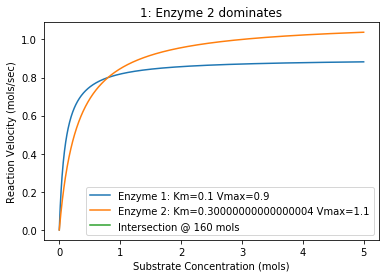

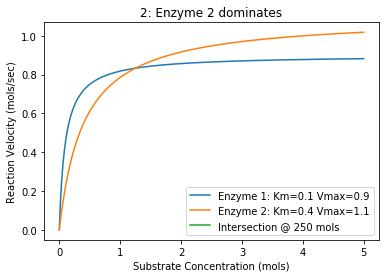

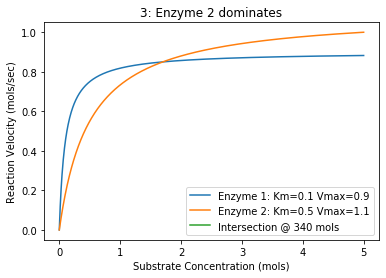

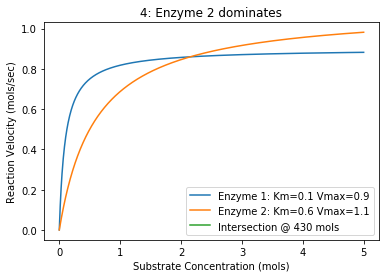

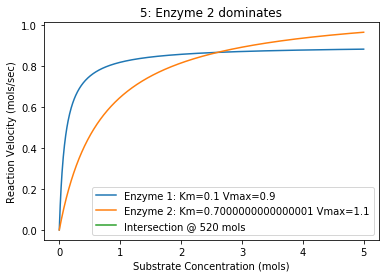

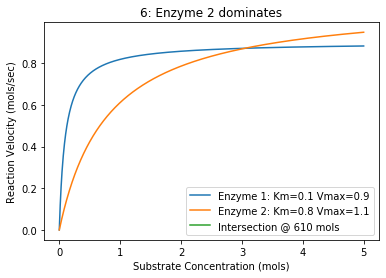

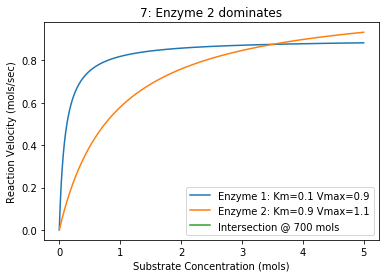

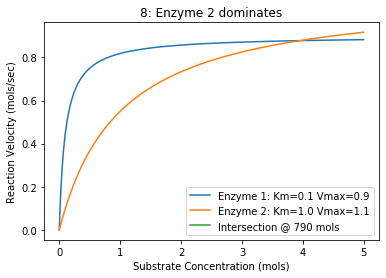

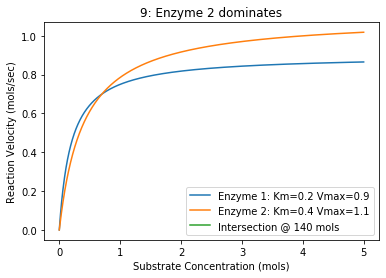

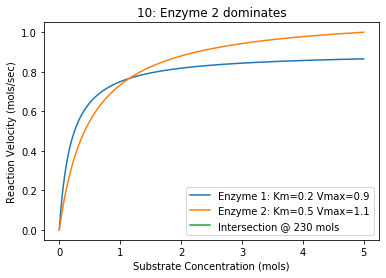

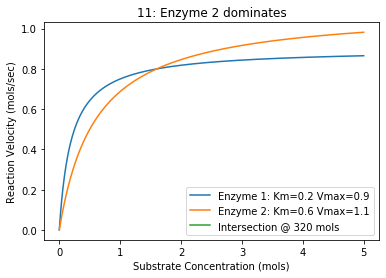

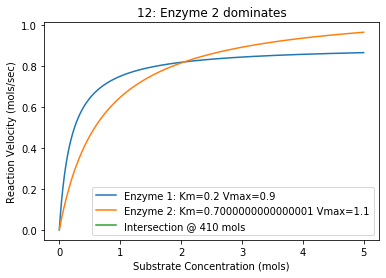

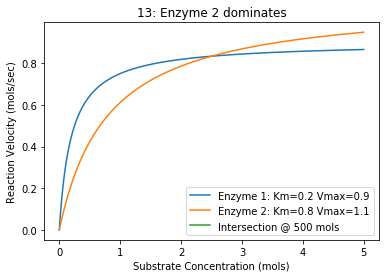

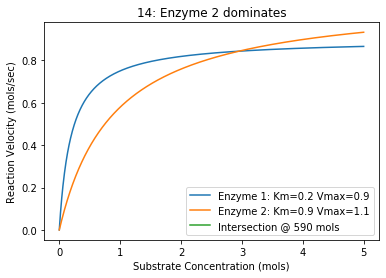

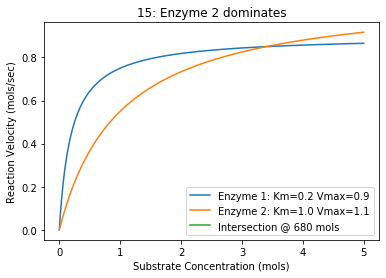

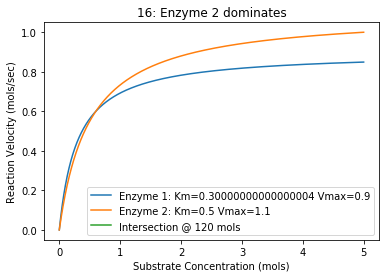

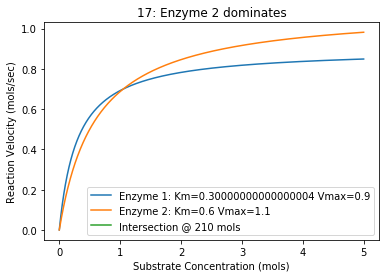

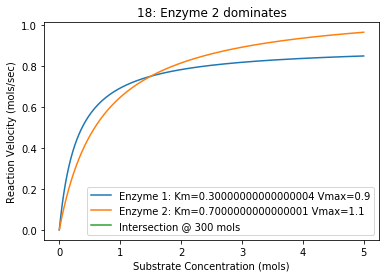

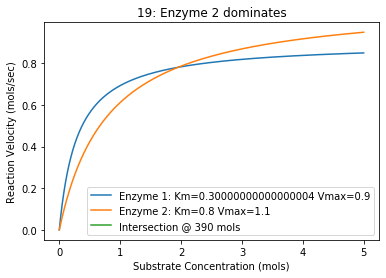

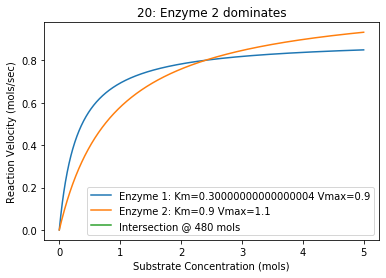

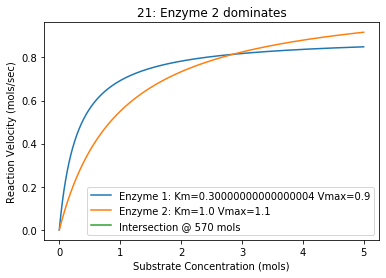

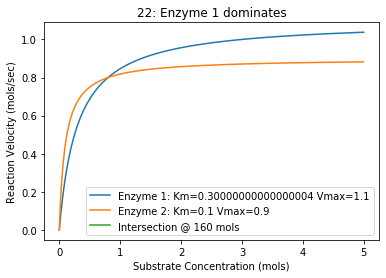

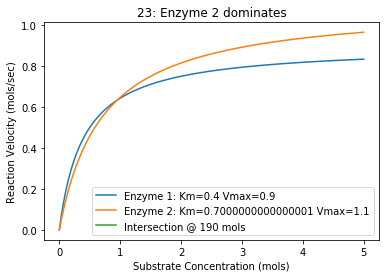

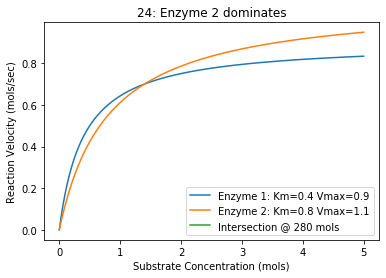

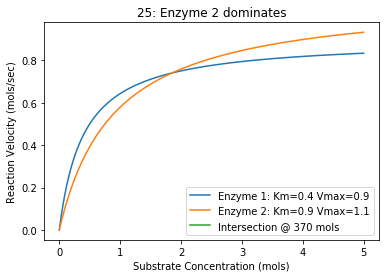

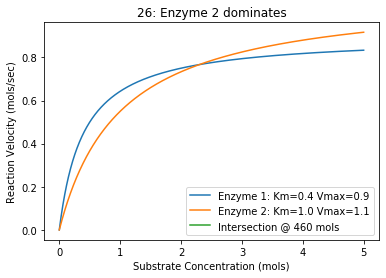

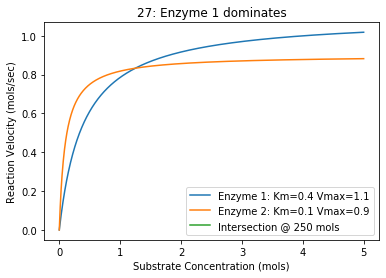

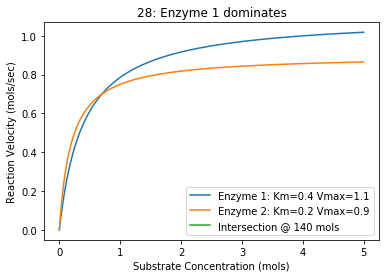

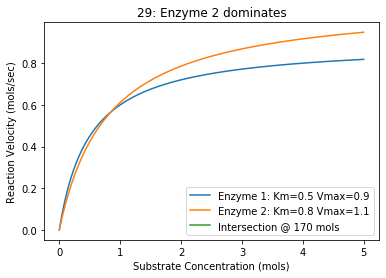

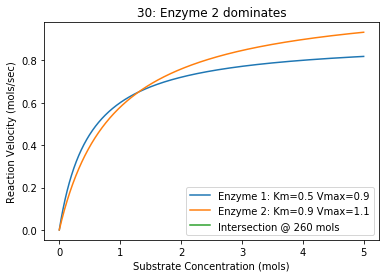

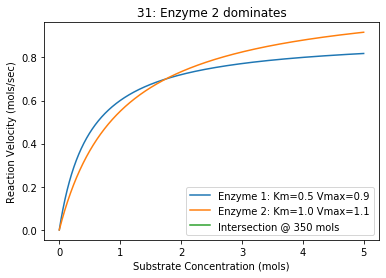

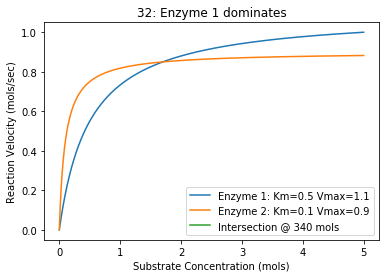

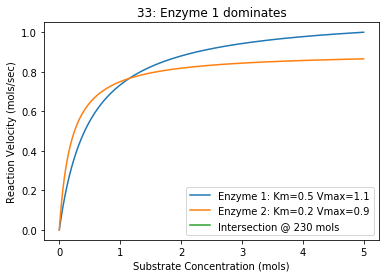

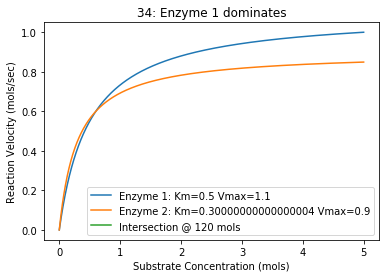

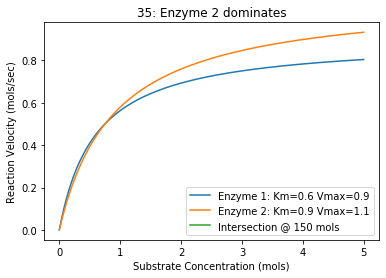

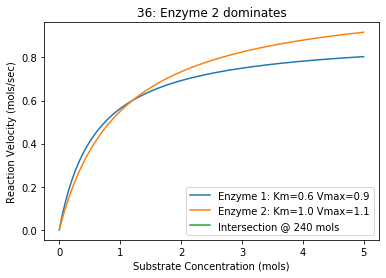

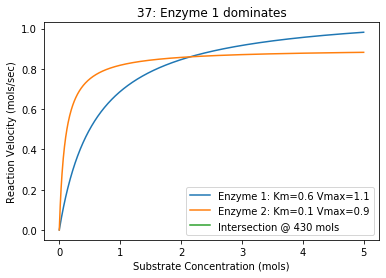

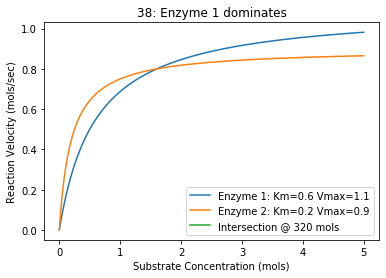

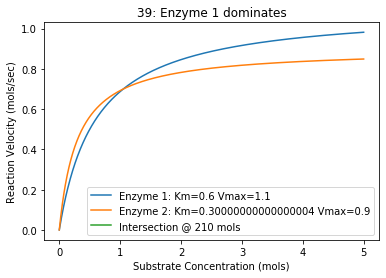

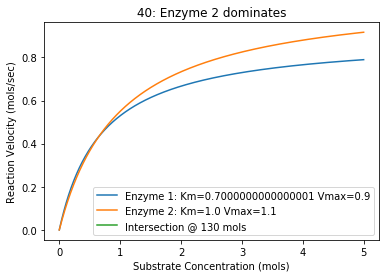

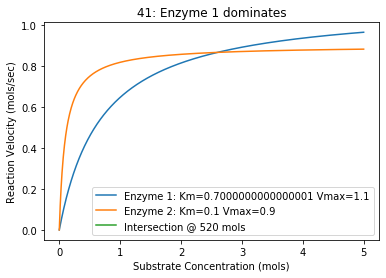

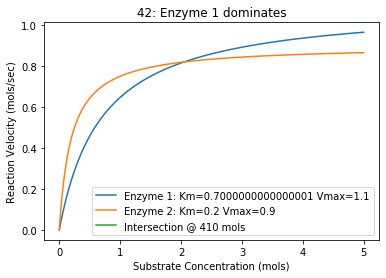

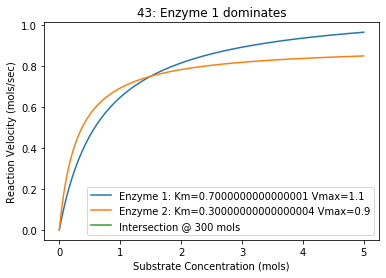

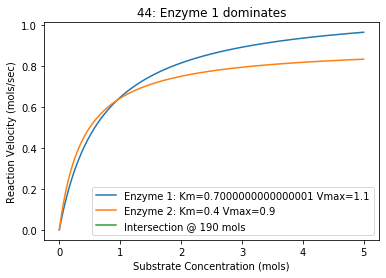

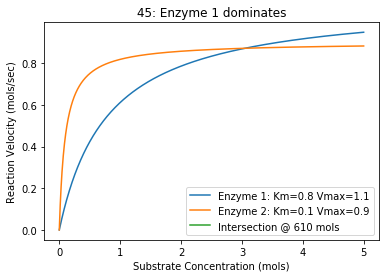

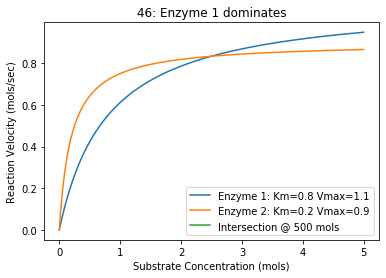

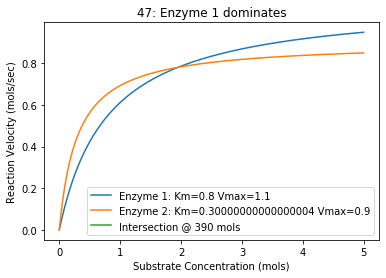

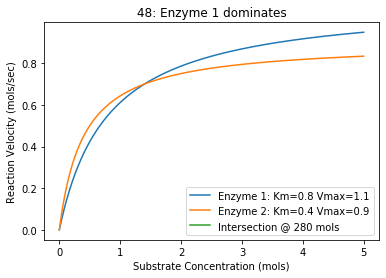

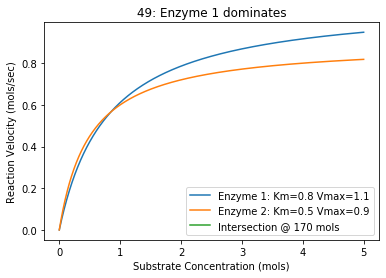

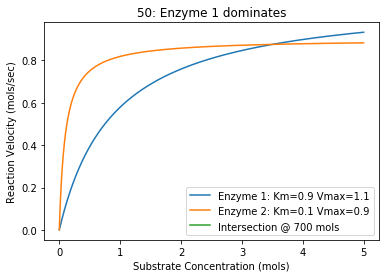

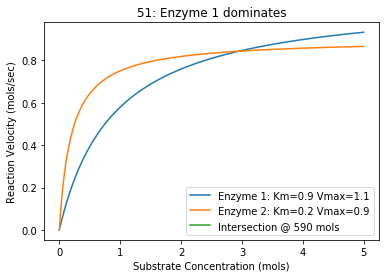

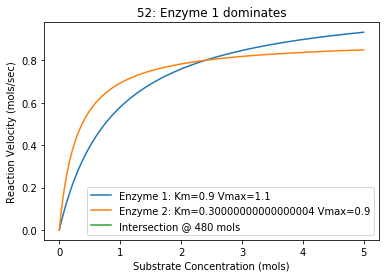

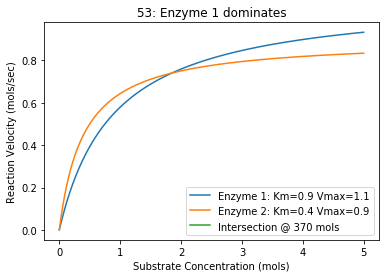

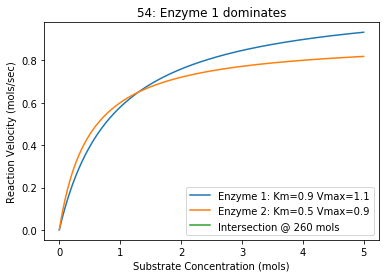

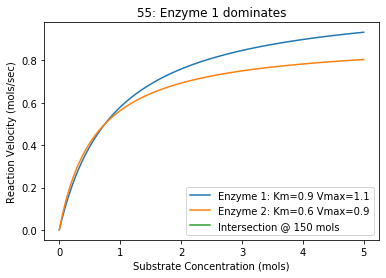

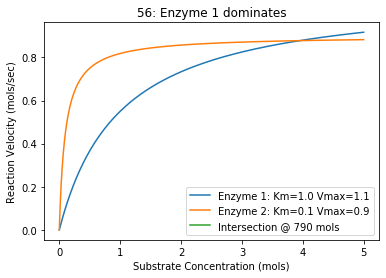

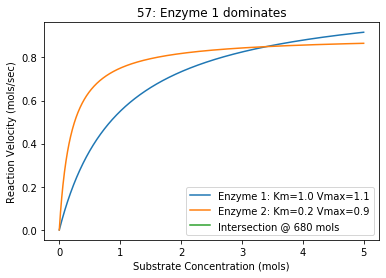

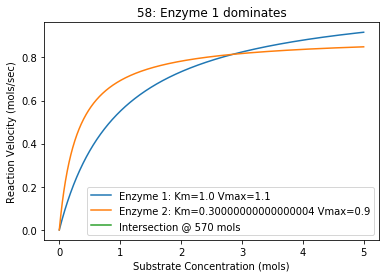

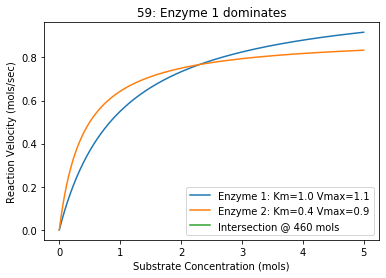

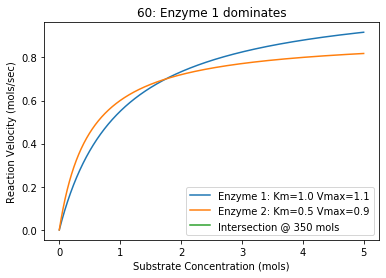

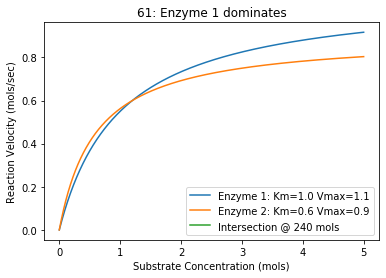

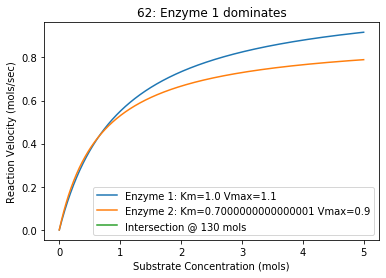

In [4]:
""" Plot All """

# Get Km and Vmax combos from the data
combos = [(km, vmax) for (km, vmax) in data]
combos = product(combos, combos)

# to keep from repeating work record km/vmax
done = list()

# to keep a count of plots produced for labeling
count = 0

# plot each combo of km/vmax
for c1, c2 in combos:
    combo = (c1, c2)
    
    # ignore enzyme with the same kinetics
    if c1 == c2:
        continue
    elif combo in done:
        # don't repeat work
        continue
    else:
        # don't repeat work
        done.append(combo)
        done.append(reversed(combo))
        
    # Try to find interesting ones
    intersect = intersection(data[c1], data[c2])
    if not intersect:
        continue
        
    count += 1
        
    plt.plot(S, data[c1], label=f'Enzyme 1: Km={c1[0]} Vmax={c1[1]}')
    plt.plot(S, data[c2], label=f'Enzyme 2: Km={c2[0]} Vmax={c2[1]}')
    plt.plot([], [], label=f'Intersection @ {intersect} mols') # GROSS
    
    plt.xlabel('Substrate Concentration (mols)')
    plt.ylabel('Reaction Velocity (mols/sec)')
    plt.title(f'{count}: Enzyme {dominant(data[c1], data[c2])} dominates')
    plt.legend()
    
    plt.show()   
    